Nov 2022

This is a fork of https://github.com/adashofdata/nlp-in-python-tutorial.  Rather than using the transcripts of stand-up comedians, it uses the text of New Testament books of the Bible.

# Sentiment Analysis

## Introduction

So far, all of the analysis we've done has been pretty generic - looking at counts, creating scatter plots, etc. These techniques could be applied to numeric data as well.

When it comes to text data, there are a few popular techniques that we'll be going through in the next few notebooks, starting with sentiment analysis. A few key points to remember with sentiment analysis.

1. **TextBlob Module:** Linguistic researchers have labeled the sentiment of words based on their domain expertise. Sentiment of words can vary based on where it is in a sentence. The TextBlob module allows us to take advantage of these labels.
2. **Sentiment Labels:** Each word in a corpus is labeled in terms of polarity and subjectivity (there are more labels as well, but we're going to ignore them for now). A corpus' sentiment is the average of these.
   * **Polarity**: How positive or negative a word is. -1 is very negative. +1 is very positive.
   * **Subjectivity**: How subjective, or opinionated a word is. 0 is fact. +1 is very much an opinion.

For more info on how TextBlob coded up its [sentiment function](https://planspace.org/20150607-textblob_sentiment/).

Let's take a look at the sentiment of the various book texts, both overall and throughout the book.

## Sentiment of Routine

In [1]:
# We'll start by reading in the corpus, which preserves word order
import pandas as pd

data = pd.read_pickle('corpus.pkl')
data

,book_text,num_chapters
Matthew,This is the record of the genealogy of Jesus ...,28
Mark,"The beginning of the gospel of Jesus Christ, ...",16
Luke,Now many have undertaken to compile an accoun...,24
John,"In the beginning was the Word, and the Word w...",21
Acts,"I wrote the former account, Theophilus, about...",28
Romans,"From Paul, a slave of Christ Jesus, called to...",16
1 Corinthians,"From Paul, called to be an apostle of Christ ...",16
2 Corinthians,"From Paul, an apostle of Christ Jesus by the ...",13
Galatians,"From Paul, an apostle (not from men, nor by h...",6
Ephesians,"From Paul, an apostle of Christ Jesus by the ...",6


In [2]:
# Create quick lambda functions to find the polarity and subjectivity of each routine
# Terminal / Anaconda Navigator: conda install -c conda-forge textblob
from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

data['polarity'] = data['book_text'].apply(pol)
data['subjectivity'] = data['book_text'].apply(sub)
data

,book_text,num_chapters,polarity,subjectivity
Matthew,This is the record of the genealogy of Jesus ...,28,0.090848,0.497518
Mark,"The beginning of the gospel of Jesus Christ, ...",16,0.088421,0.451477
Luke,Now many have undertaken to compile an accoun...,24,0.112614,0.485596
John,"In the beginning was the Word, and the Word w...",21,0.127841,0.460800
Acts,"I wrote the former account, Theophilus, about...",28,0.133863,0.483629
Romans,"From Paul, a slave of Christ Jesus, called to...",16,0.137725,0.535729
1 Corinthians,"From Paul, called to be an apostle of Christ ...",16,0.132589,0.488816
2 Corinthians,"From Paul, an apostle of Christ Jesus by the ...",13,0.132779,0.517246
Galatians,"From Paul, an apostle (not from men, nor by h...",6,0.112354,0.522140
Ephesians,"From Paul, an apostle of Christ Jesus by the ...",6,0.173475,0.555206


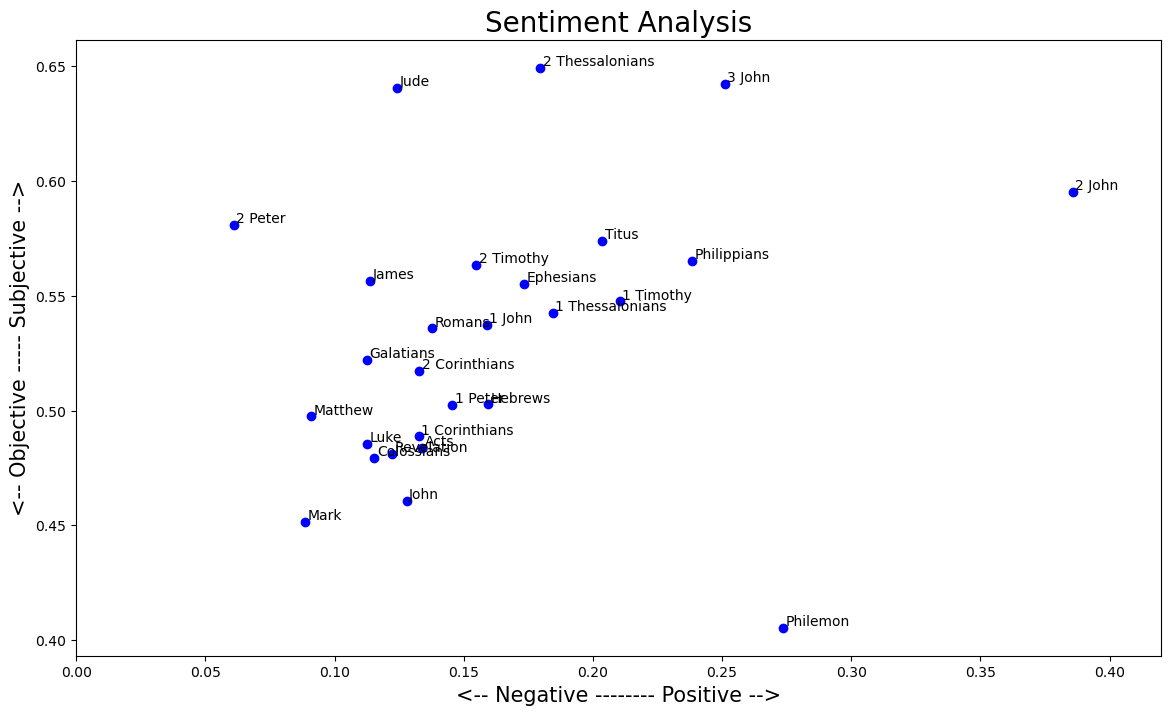

In [3]:
# Let's plot the results
%matplotlib inline
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [14, 8]

for index, book in enumerate(data.index):
    x = data.polarity.loc[book]
    y = data.subjectivity.loc[book]
    plt.scatter(x, y, color='blue')
    plt.text(x+.001, y+.001, book, fontsize=10)
    plt.xlim(0.0, .42) 
    
plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=15)
plt.ylabel('<-- Objective ----- Subjective -->', fontsize=15)

plt.show()

## Sentiment changes throughout book

Instead of looking at the overall sentiment, let's see if there's anything interesting about the sentiment over time throughout each book.

In [4]:
# Split each routine into 10 parts
import numpy as np
import math

def split_text(text, n=10):
    '''Takes in a string of text and splits into n equal parts, with a default of 10 equal parts.'''

    # Calculate length of text, the size of each chunk of text and the starting points of each chunk of text
    length = len(text)
    size = math.floor(length / n)
    start = np.arange(0, length, size)
    
    # Pull out equally sized pieces of text and put it into a list
    split_list = []
    for piece in range(n):
        split_list.append(text[start[piece]:start[piece]+size])
    return split_list

In [5]:
# Let's take a look at our data again
data

,book_text,num_chapters,polarity,subjectivity
Matthew,This is the record of the genealogy of Jesus ...,28,0.090848,0.497518
Mark,"The beginning of the gospel of Jesus Christ, ...",16,0.088421,0.451477
Luke,Now many have undertaken to compile an accoun...,24,0.112614,0.485596
John,"In the beginning was the Word, and the Word w...",21,0.127841,0.460800
Acts,"I wrote the former account, Theophilus, about...",28,0.133863,0.483629
Romans,"From Paul, a slave of Christ Jesus, called to...",16,0.137725,0.535729
1 Corinthians,"From Paul, called to be an apostle of Christ ...",16,0.132589,0.488816
2 Corinthians,"From Paul, an apostle of Christ Jesus by the ...",13,0.132779,0.517246
Galatians,"From Paul, an apostle (not from men, nor by h...",6,0.112354,0.522140
Ephesians,"From Paul, an apostle of Christ Jesus by the ...",6,0.173475,0.555206


In [6]:
# Let's create a list to hold all of the pieces of text

num_parts = 10
list_pieces = []
for t in data.book_text:
    split = split_text(t, num_parts)
    list_pieces.append(split)
    
#list_pieces

In [7]:
# The list has 10 elements, one for each book
len(list_pieces)

27

In [8]:
# Each book has been split into 10 pieces of text
len(list_pieces[0])

10

In [9]:
# Calculate the polarity for each piece of text

polarity_in_book = []
for lp in list_pieces:
    polarity_piece = []
    for p in lp:
        polarity_piece.append(TextBlob(p).sentiment.polarity)
    polarity_in_book.append(polarity_piece)

# Show the polarity values in the first book
polarity_in_book[0]

[0.15358013238965615,
 0.1115260287106136,
 0.0005409487027134057,
 0.14393704906204902,
 0.00744108419670216,
 0.089671926910299,
 0.07658168613357294,
 0.16757470608960098,
 0.048455289967049,
 0.11047453248210827]

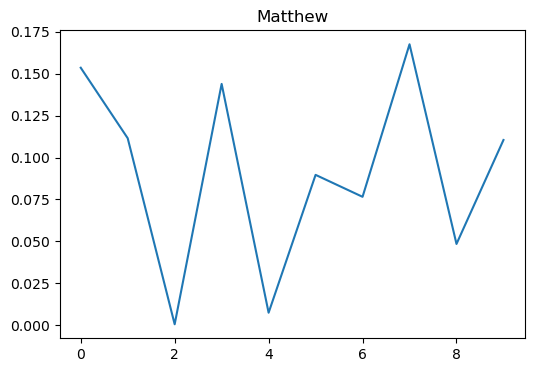

In [10]:
# Show the plot for one book
plt.figure(figsize=(6,4))
plt.plot(polarity_in_book[0])
plt.title(data.index[0])
plt.show()

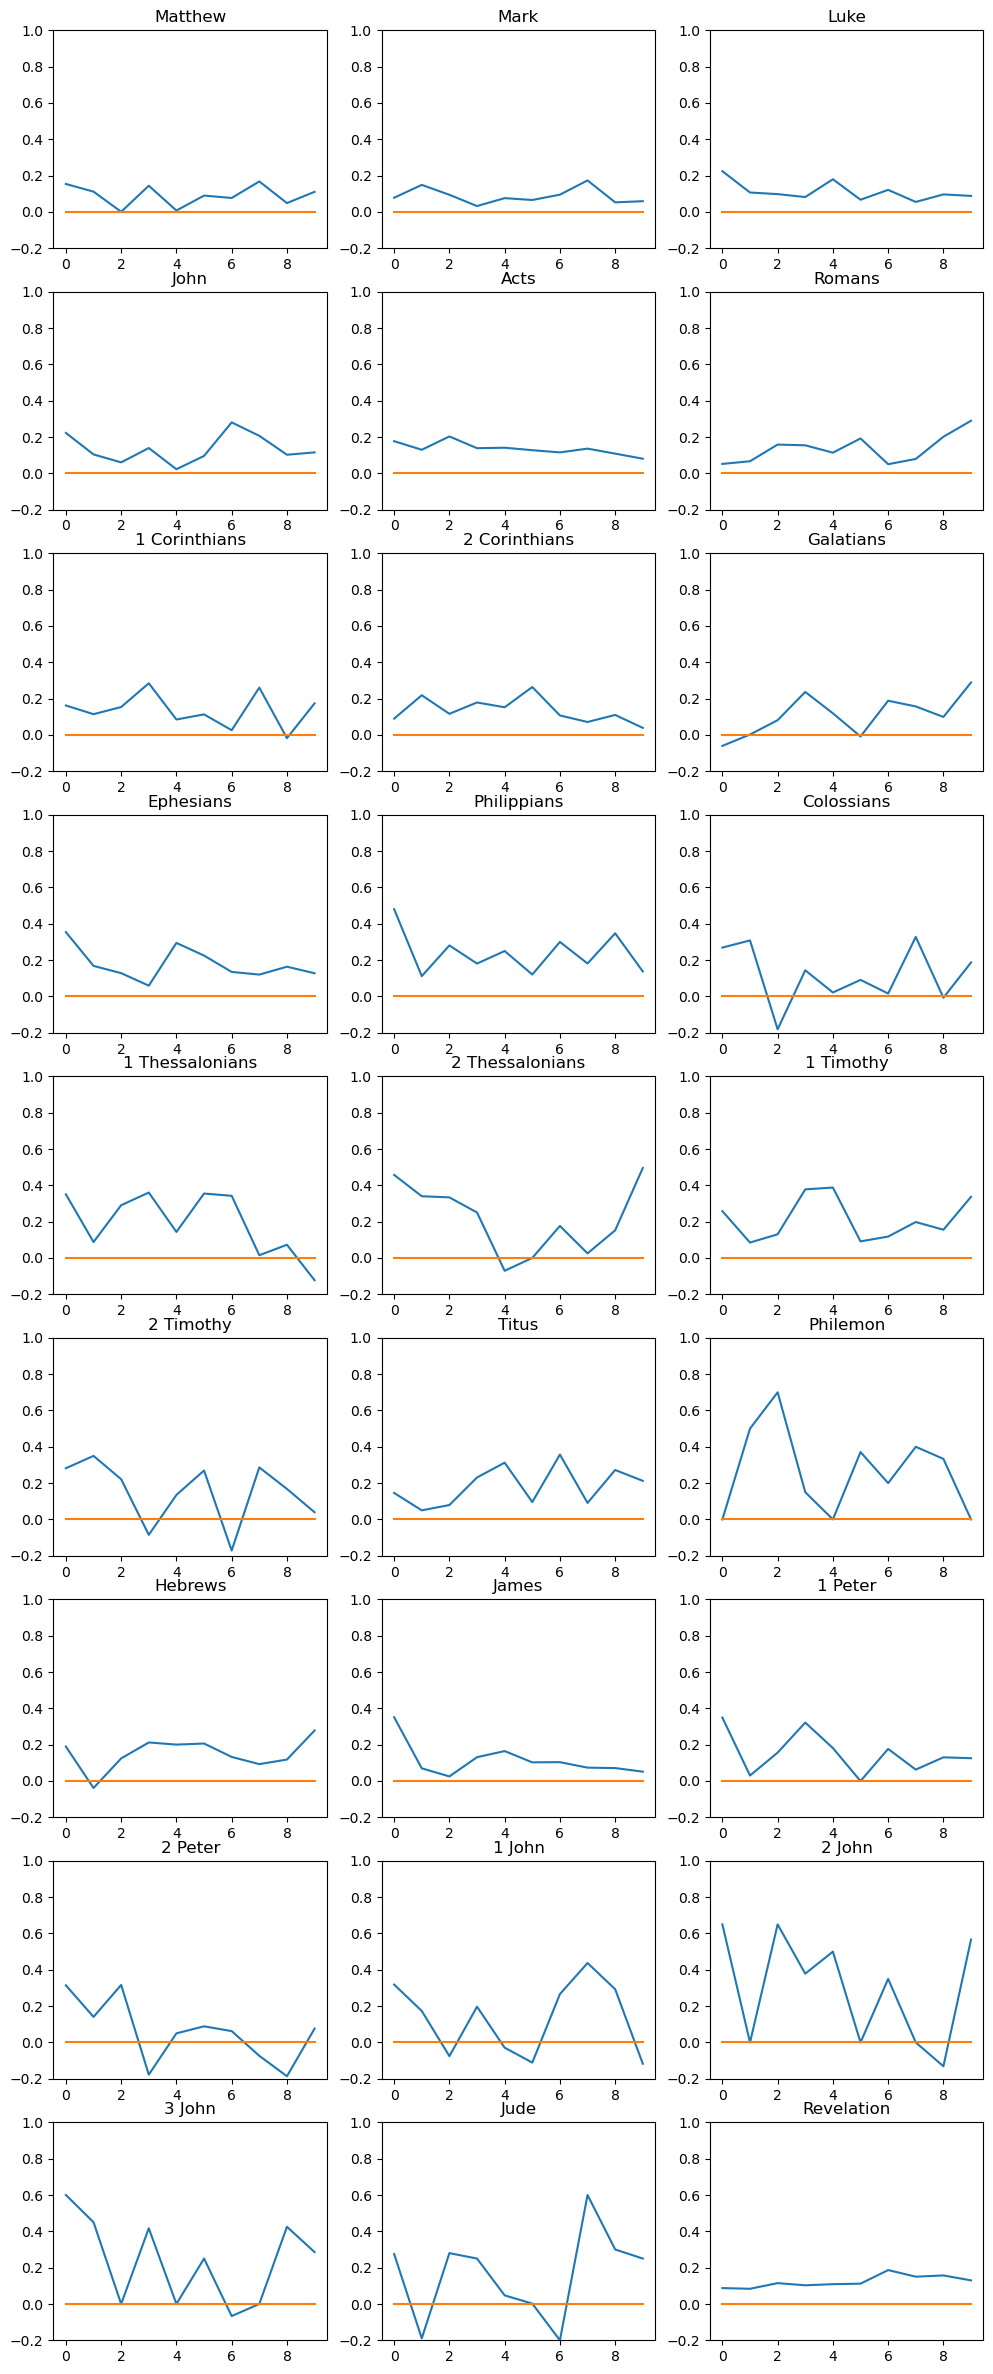

In [11]:
# Show the plot for all books
plt.rcParams['figure.figsize'] = [12, 30]

for index, book in enumerate(data.index):    
    plt.subplot(9, 3, index+1)
    plt.plot(polarity_in_book[index])
    plt.plot(np.arange(0, num_parts), np.zeros(num_parts))
    plt.title(book)
    plt.ylim(bottom=-.2, top=1)
    
plt.show()

Observations?

## Additional Exercises

1. Modify the number of sections the book is split into and see how the charts change.